<a href="https://colab.research.google.com/github/gverafei/artificial-networks-technologies/blob/main/tarea7_modelo/tarea7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea 7: Aplicación de CNN en Visión Artificial**

**Instrucciones:**

Aplique una CNN preentrenada, tales como VGGNet, ResNet, MobileNet, YOLO o cualquier otra que haya investigado para resolver un caso práctico de visión por computadora, utilizando técnicas de carga de modelos, extracción de características y fine-tuning.

El problema a resolver es libre.

Para este caso, se utilizara VGG-Net16 preentrenada para clasificar perros y gatos en tiempo real.

**Entregables**

+ Documento del trabajo (Springer)
+ Código de la implementación (.zip o link al repositorio en Github)


## A. Configura el ambiente de pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)
pd.set_option('display.precision', 3)
pd.set_option('display.width', 800)

print("Versiones -> pandas:", pd.__version__)

Versiones -> pandas: 2.2.2



## 1. Cargamos el dataset a utilizar


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

#Descargar el set de datos de perros y gatos
datos, metadatos = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)


In [3]:
#Imprimir los metadatos para revisarlos
metadatos

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, Jo

,image,label
0,,1 (dog)
1,,1 (dog)
2,,1 (dog)
3,,0 (cat)
4,,1 (dog)

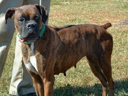
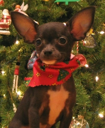
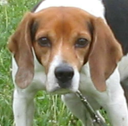
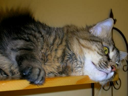
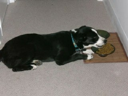

In [4]:
#Una forma de mostrar 5 ejemplos del set
tfds.as_dataframe(datos['train'].take(5), metadatos)

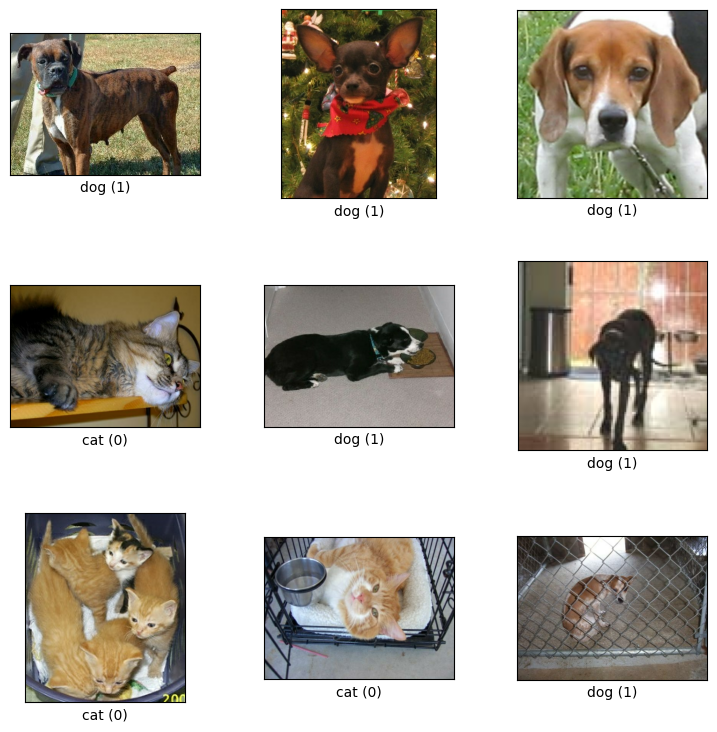

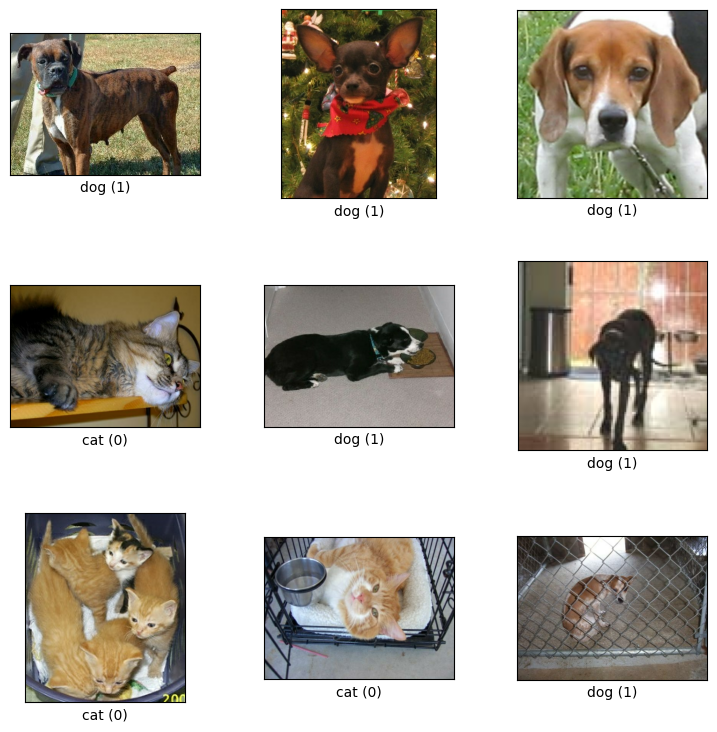

In [5]:
#Otra forma de mostrar ejemplos del set
tfds.show_examples(datos['train'], metadatos)

In [8]:
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(20,20))

# 1. Parámetros básicos
TAMANO_IMG=224      # VGG16 usa 224x224

<Figure size 2000x2000 with 0 Axes>

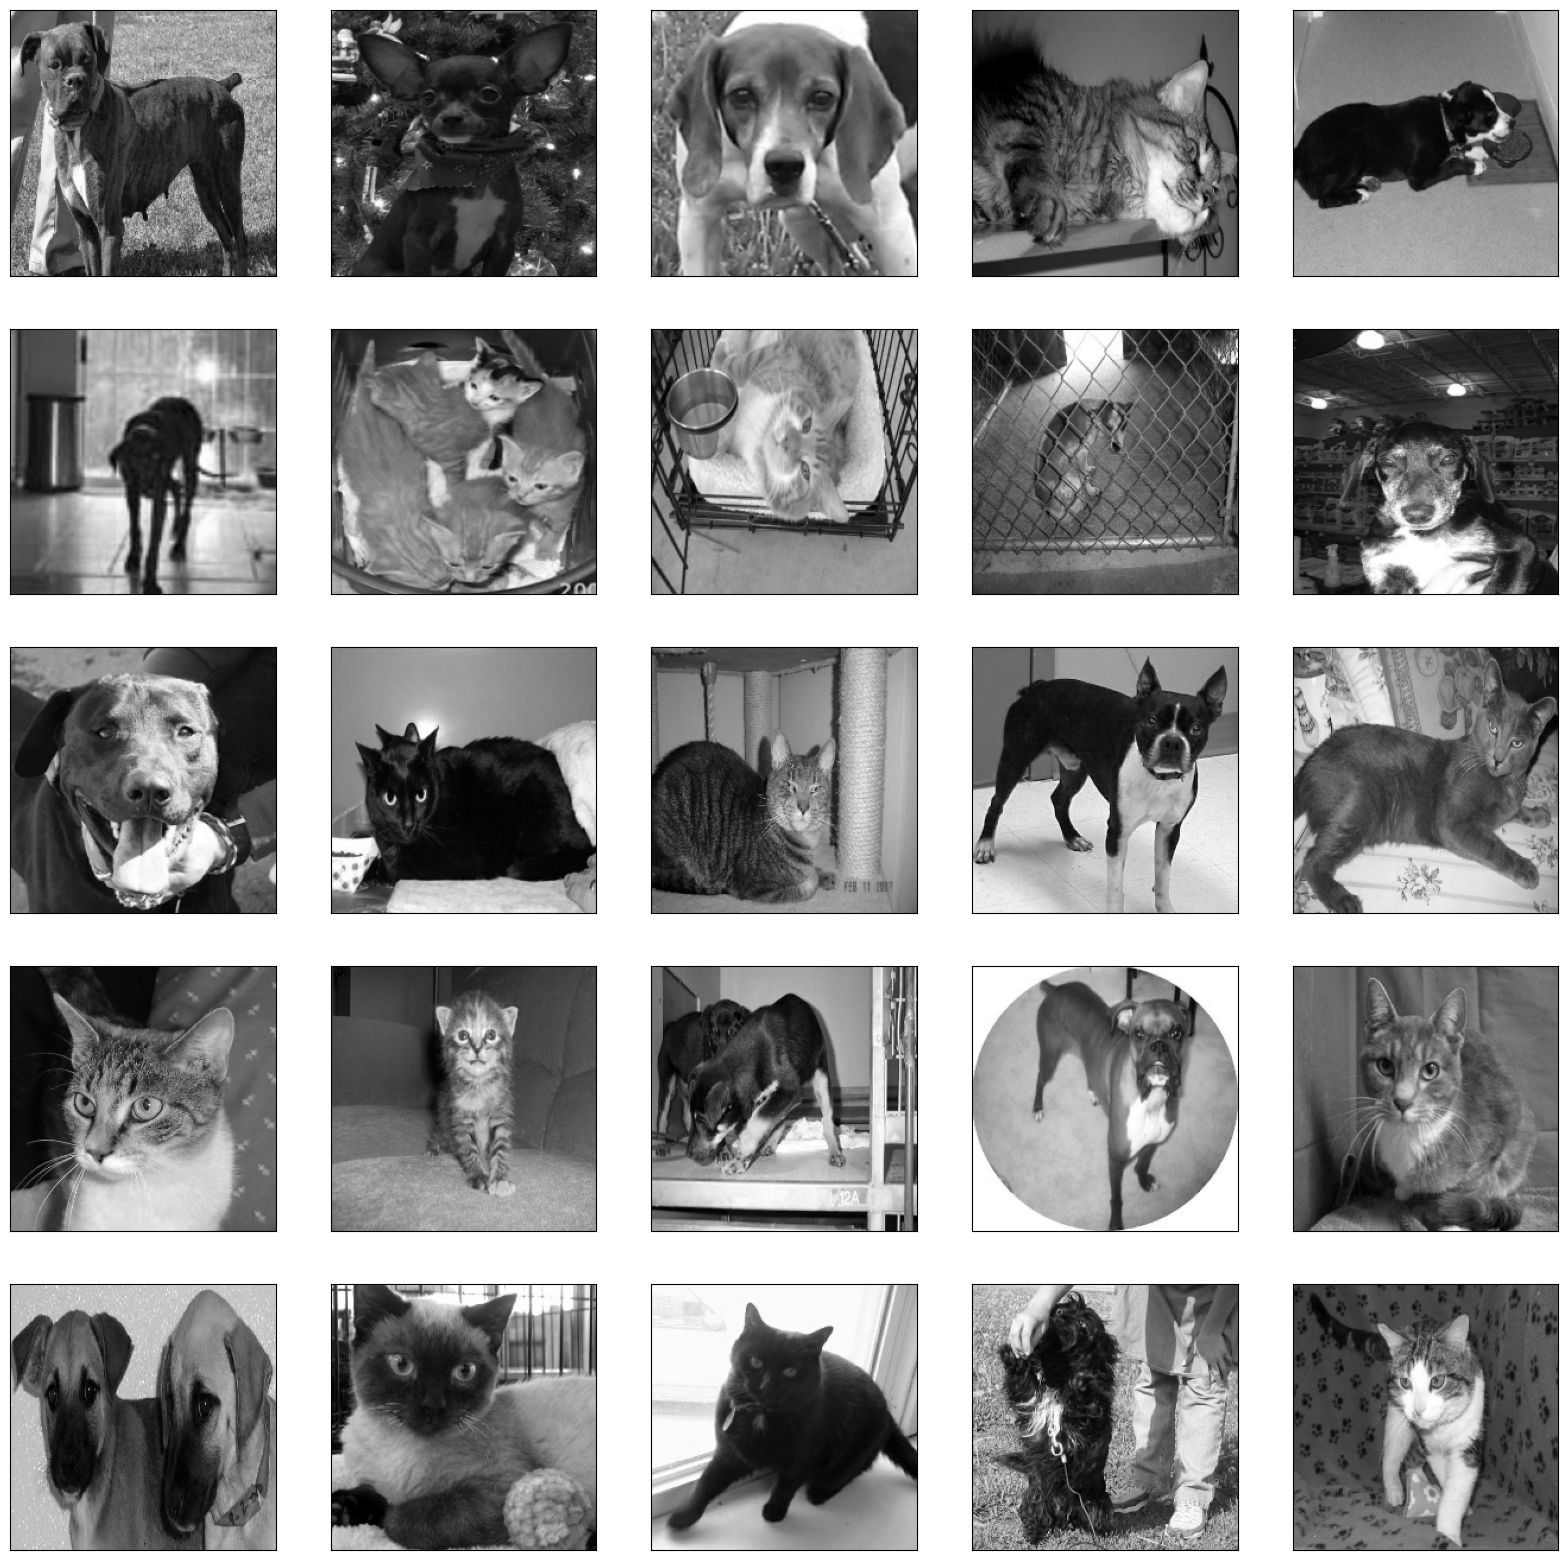

In [6]:
#Manipular y visualizar el set
#Lo pasamos a TAMANO_IMG (224x224) que es el tamaño que requiere VGG16 y a blanco y negro (solo para visualizar)
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(20,20))

for i, (imagen, etiqueta) in enumerate(datos['train'].take(25)):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen, cmap='gray')

In [9]:
#Variable que contendra todos los pares de los datos (imagen y etiqueta) ya modificados (blanco y negro, 100x100)
datos_entrenamiento = []

In [10]:
for i, (imagen, etiqueta) in enumerate(datos['train']): #Todos los datos
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1) #Cambiar tamano a 100,100,1
  datos_entrenamiento.append([imagen, etiqueta])

In [11]:
#Ver los datos del primer indice
datos_entrenamiento[0]

[array([[[254],
         [246],
         [235],
         ...,
         [173],
         [157],
         [132]],
 
        [[250],
         [244],
         [222],
         ...,
         [172],
         [164],
         [156]],
 
        [[246],
         [235],
         [201],
         ...,
         [166],
         [170],
         [171]],
 
        ...,
 
        [[143],
         [151],
         [151],
         ...,
         [141],
         [137],
         [100]],
 
        [[127],
         [121],
         [183],
         ...,
         [ 79],
         [ 83],
         [ 50]],
 
        [[103],
         [108],
         [156],
         ...,
         [ 40],
         [ 54],
         [ 49]]], dtype=uint8),
 <tf.Tensor: shape=(), dtype=int64, numpy=1>]

In [12]:
#Ver cuantos datos tengo en la variable
len(datos_entrenamiento)

23262

In [13]:
#Preparar mis variables X (entradas) y y (etiquetas) separadas

X = [] #imagenes de entrada (pixeles)
y = [] #etiquetas (perro o gato)

for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

In [1]:
#Normalizar los datos de las X (imagenes). Se pasan a numero flotante y dividen entre 255 para quedar de 0-1 en lugar de 0-255
import numpy as np

X = np.array(X).astype(float) / 255

NameError: name 'X' is not defined